In [2]:
import matplotlib.image as mpimg
import os
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.models import Sequential
from keras import layers
from tensorflow import keras
from tensorflow.keras.layers import Rescaling
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
from glob import glob
import cv2

In [3]:
train_path = "/content/drive/MyDrive/TrafficSignRecognition/traffic_Data/DATA"
test_path = "/content/drive/MyDrive/TrafficSignRecognition/traffic_Data/TEST"

In [4]:
dataset = '../content/traffic_Data/DATA'

In [5]:
labelfile = pd.read_csv('/content/drive/MyDrive/TrafficSignRecognition/labels.csv')

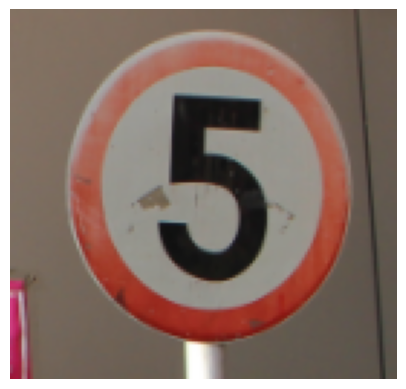

In [6]:
import cv2
import matplotlib.pyplot as plt
img_path = "/content/drive/MyDrive/TrafficSignRecognition/traffic_Data/DATA/0/000_0001.png"
img = cv2.imread(img_path)
if img is None:
    print("Error: Image not found. Check the file path.")
else:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for Matplotlib
    plt.imshow(img)
    plt.axis("off")
    plt.show()

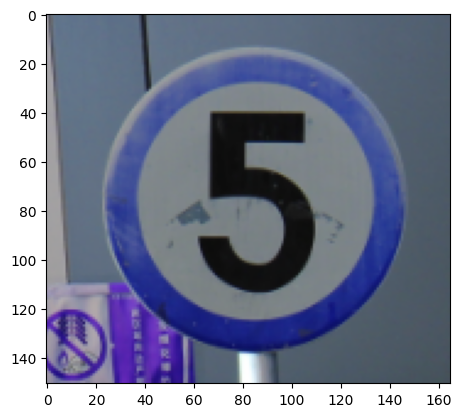

In [7]:
img = cv2.imread("/content/drive/MyDrive/TrafficSignRecognition/traffic_Data/DATA/0/000_0002.png")
plt.imshow(img)

In [8]:
labelfile.head()

,ClassId,Name
0,0,Speed limit (5km/h)
1,1,Speed limit (15km/h)
2,2,Speed limit (30km/h)
3,3,Speed limit (40km/h)
4,4,Speed limit (50km/h)


In [9]:
labelfile.tail()

,ClassId,Name
53,53,Give Way
54,54,No stopping
55,55,No entry
56,56,Unknown7
57,57,Unknown8


In [10]:
import tensorflow as tf
dataset = "/content/drive/MyDrive/TrafficSignRecognition/traffic_Data/DATA"  # Set correct dataset path

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset,
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=(224, 224),
    batch_size=32
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset,
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=(224, 224),
    batch_size=32
)

Found 4170 files belonging to 58 classes.
Using 3336 files for training.
Found 4170 files belonging to 58 classes.
Using 834 files for validation.


In [12]:
import tensorflow as tf

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical", input_shape=(224, 224, 3)),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.2)
])


In [13]:
model = Sequential()
model.add(data_augmentation)
model.add(Rescaling(1./255))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(len(labelfile), activation='softmax'))


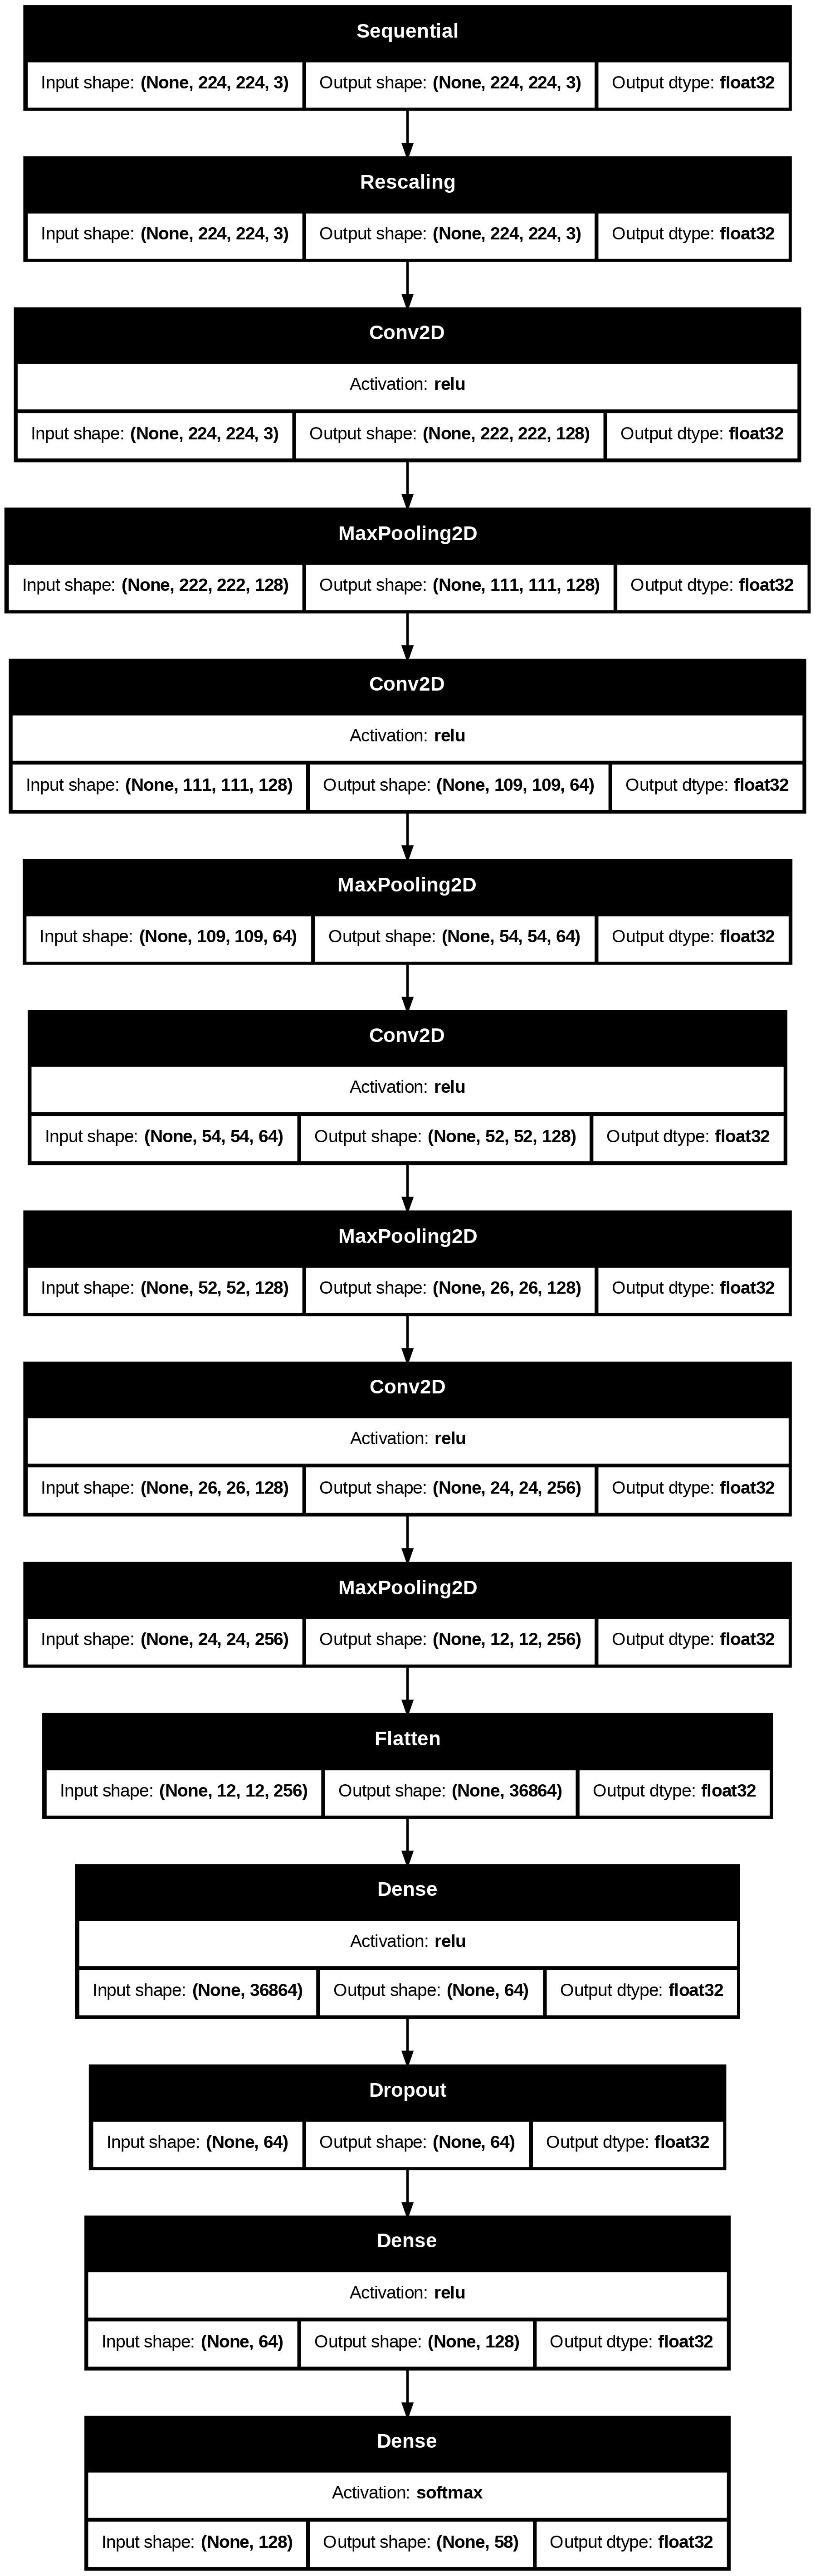

In [14]:
keras.utils.plot_model(
    model,
    show_shapes=True,
    show_dtype=True,
    show_layer_activations=True
)

In [15]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer='adam',
              metrics=['accuracy'])

In [16]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define callbacks
mycallbacks = [
    EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True,
        verbose=1
    ),
    ModelCheckpoint(
        filepath='best_model.keras',          # Save only the best model
        monitor='val_loss',
        save_best_only=True,
        verbose=1
    )
]

# Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
    callbacks=mycallbacks
)

# (Optional) Save final model as well
model.save("final_model.keras")  # OR use model.save("final_model") for full format


Epoch 1/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.1286 - loss: 3.4769
Epoch 1: val_loss improved from inf to 2.34637, saving model to best_model.keras
105/105 ━━━━━━━━━━━━━━━━━━━━ 788s 7s/step - accuracy: 0.1293 - loss: 3.4730 - val_accuracy: 0.3609 - val_loss: 2.3464
Epoch 2/50
104/105 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.3601 - loss: 2.3496
Epoch 2: val_loss improved from 2.34637 to 1.66395, saving model to best_model.keras
105/105 ━━━━━━━━━━━━━━━━━━━━ 31s 140ms/step - accuracy: 0.3606 - loss: 2.3467 - val_accuracy: 0.4904 - val_loss: 1.6640
Epoch 3/50
104/105 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.4519 - loss: 1.8249
Epoch 3: val_loss improved from 1.66395 to 1.40816, saving model to best_model.keras
105/105 ━━━━━━━━━━━━━━━━━━━━ 21s 141ms/step - accuracy: 0.4522 - loss: 1.8234 - val_accuracy: 0.5851 - val_loss: 1.4082
Epoch 4/50
104/105 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.4965 - loss: 1.5815
Epoch 4: val_loss improved from 1.40816 to

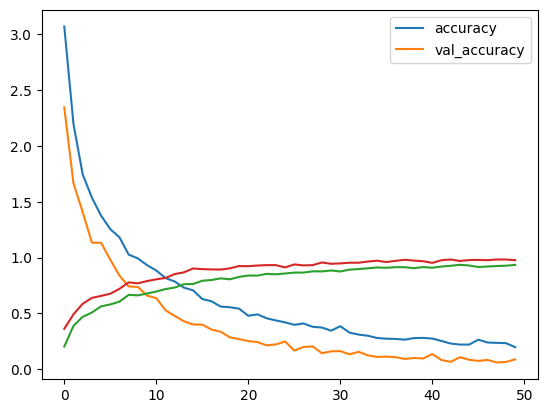

In [17]:
# Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'], loc='upper right')

# Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'], loc='upper right')

